In [13]:
from matplotlib import pyplot as plt
import numpy as np
import os
import cv2

In [14]:
input_path = 'C:\\Users\\sinad\\Dropbox (Gladstone)\\Feature_based_classification\\ten-crops-somas-vs-neurites'

In [15]:
img_list = os.listdir(input_path)

In [16]:
img_mean_list = []
for img in img_list:
    current_img_path = os.path.join(input_path, img)
    current_img = cv2.imread(current_img_path, -1)
    current_img_mean = np.round(np.mean(current_img),2)
    img_mean_list.append([img, current_img_mean])
    
print(img_mean_list)

[['PID20190102_SB11-15-Plate1_T0_0_A6_0_RFP-DFTrCy5_BGpbs_MN_ALIGNED_13.tif', 4303.38], ['PID20190102_SB11-15-Plate1_T0_0_A7_0_RFP-DFTrCy5_BGpbs_MN_ALIGNED_4.tif', 6423.93], ['PID20190102_SB11-15-Plate1_T0_0_A7_0_RFP-DFTrCy5_BGpbs_MN_ALIGNED_5.tif', 6867.27], ['PID20190102_SB11-15-Plate1_T0_0_A7_0_RFP-DFTrCy5_BGpbs_MN_ALIGNED_6.tif', 4680.99], ['PID20190102_SB11-15-Plate1_T0_0_A7_0_RFP-DFTrCy5_BGpbs_MN_ALIGNED_8.tif', 4155.0], ['PID20190102_SB11-15-Plate2_T0_0_C11_0_RFP-DFTrCy5_BGpbs_MN_ALIGNED_7.tif', 3018.54], ['PID20190102_SB11-15-Plate2_T0_0_C12_0_RFP-DFTrCy5_BGpbs_MN_ALIGNED_8.tif', 2323.37], ['PID20190102_SB11-15-Plate2_T0_0_C8_0_RFP-DFTrCy5_BGpbs_MN_ALIGNED_6.tif', 2653.63], ['PID20190102_SB11-15-Plate2_T0_0_H12_0_RFP-DFTrCy5_BGpbs_MN_ALIGNED_11.tif', 1740.9], ['PID20190102_SB11-15-Plate2_T0_0_H12_0_RFP-DFTrCy5_BGpbs_MN_ALIGNED_12.tif', 2064.47]]


In [17]:
img_mean_list_class1 = [fn for fn in img_mean_list if 'Plate1' in fn[0]]
print(img_mean_list_class1)

img_mean_list_class2 = [fn for fn in img_mean_list if 'Plate2' in fn[0]]
img_mean_list_class2

[['PID20190102_SB11-15-Plate1_T0_0_A6_0_RFP-DFTrCy5_BGpbs_MN_ALIGNED_13.tif', 4303.38], ['PID20190102_SB11-15-Plate1_T0_0_A7_0_RFP-DFTrCy5_BGpbs_MN_ALIGNED_4.tif', 6423.93], ['PID20190102_SB11-15-Plate1_T0_0_A7_0_RFP-DFTrCy5_BGpbs_MN_ALIGNED_5.tif', 6867.27], ['PID20190102_SB11-15-Plate1_T0_0_A7_0_RFP-DFTrCy5_BGpbs_MN_ALIGNED_6.tif', 4680.99], ['PID20190102_SB11-15-Plate1_T0_0_A7_0_RFP-DFTrCy5_BGpbs_MN_ALIGNED_8.tif', 4155.0]]


[['PID20190102_SB11-15-Plate2_T0_0_C11_0_RFP-DFTrCy5_BGpbs_MN_ALIGNED_7.tif',
  3018.54],
 ['PID20190102_SB11-15-Plate2_T0_0_C12_0_RFP-DFTrCy5_BGpbs_MN_ALIGNED_8.tif',
  2323.37],
 ['PID20190102_SB11-15-Plate2_T0_0_C8_0_RFP-DFTrCy5_BGpbs_MN_ALIGNED_6.tif',
  2653.63],
 ['PID20190102_SB11-15-Plate2_T0_0_H12_0_RFP-DFTrCy5_BGpbs_MN_ALIGNED_11.tif',
  1740.9],
 ['PID20190102_SB11-15-Plate2_T0_0_H12_0_RFP-DFTrCy5_BGpbs_MN_ALIGNED_12.tif',
  2064.47]]

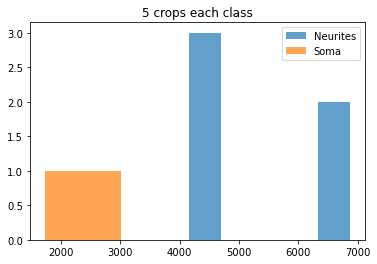

In [18]:
img_mean_list_class1_values = [i[1] for i in img_mean_list_class1]
img_mean_list_class2_values = [j[1] for j in img_mean_list_class2]
plt.title("5 crops each class")
plt.hist(img_mean_list_class1_values, bins=5, range=(np.min(img_mean_list_class1_values),
                                                          np.max(img_mean_list_class1_values)),
             label='Neurites', alpha=0.7)
plt.hist(img_mean_list_class2_values, bins=5, range=(np.min(img_mean_list_class2_values),
                                                          np.max(img_mean_list_class2_values)),
             label='Soma', alpha=0.7)
plt.legend(loc='upper right')
plt.show()

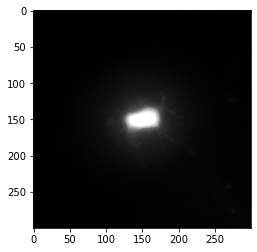

In [28]:
current_img_path = os.path.join(input_path, img_list[6])
current_img = cv2.imread(current_img_path)
plt.imshow(current_img)

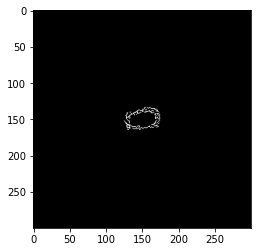

In [20]:
edges = cv2.Canny(current_img, 100, 200)
plt.figure("img Canny edge detection")
plt.imshow(edges, cmap='gray')

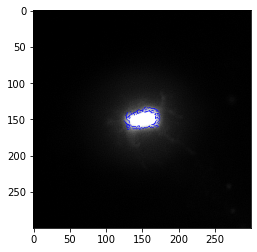

In [21]:
contours, hierarchy = cv2.findContours(edges, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
plt.figure("img contours drawn")
plt.imshow(cv2.drawContours(current_img, contours, -1, (0, 0, 255), 1))

(array([7.1466e+04, 3.8994e+04, 3.2856e+04, 2.5845e+04, 1.7559e+04,
        1.1772e+04, 8.4570e+03, 5.9730e+03, 4.4880e+03, 3.9870e+03,
        3.5160e+03, 3.1620e+03, 2.9370e+03, 2.6700e+03, 2.2170e+03,
        2.3490e+03, 2.1990e+03, 1.9230e+03, 1.6860e+03, 1.4760e+03,
        1.4160e+03, 1.3560e+03, 1.1310e+03, 1.0260e+03, 9.9900e+02,
        9.6000e+02, 8.7000e+02, 8.5800e+02, 7.7400e+02, 6.4800e+02,
        6.6000e+02, 5.9400e+02, 5.2200e+02, 5.1000e+02, 4.4700e+02,
        3.6900e+02, 3.9600e+02, 3.9000e+02, 3.7800e+02, 3.6300e+02,
        3.2100e+02, 3.1200e+02, 3.0000e+02, 2.6700e+02, 2.3400e+02,
        2.4300e+02, 2.7300e+02, 2.1000e+02, 2.0100e+02, 2.0700e+02,
        1.4700e+02, 1.3800e+02, 1.7400e+02, 1.5000e+02, 1.7100e+02,
        1.0800e+02, 1.1100e+02, 1.2600e+02, 7.8000e+01, 1.0200e+02,
        1.0500e+02, 7.5000e+01, 8.7000e+01, 9.0000e+01, 9.6000e+01,
        5.4000e+01, 7.8000e+01, 9.0000e+01, 7.8000e+01, 8.1000e+01,
        6.6000e+01, 7.5000e+01, 6.3000e+01, 7.50

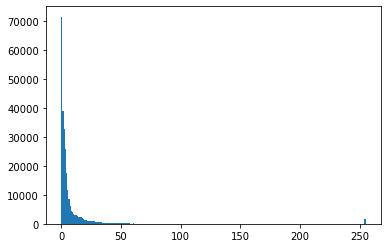

In [29]:
plt.hist(current_img.ravel(), bins=256)

img normalized mean:  0.0339228322440087
img normalized std dev:  0.10462385981452263


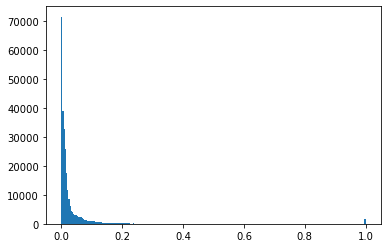

In [30]:
current_img_normalized = (current_img - current_img.min()) / (current_img.max() - current_img.min())
plt.hist(current_img_normalized.ravel(), bins=256)
current_img_normalized_mean = current_img_normalized.mean()
current_img_normalized_std = current_img_normalized.std()
print("img normalized mean: ", current_img_normalized_mean)
print("img normalized std dev: ", current_img_normalized_std)

img standardized mean:  0.0339228322440087
img standardized std dev:  0.10462385981452263


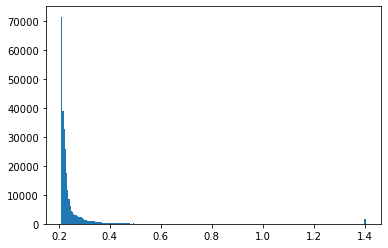

In [31]:
mean_correction_factor = 0.25 - current_img_normalized_mean
stdDev_correction_factor = 0.125 / current_img_normalized_std
current_img_standardized = (current_img_normalized - mean_correction_factor) * stdDev_correction_factor
current_img_standardized_corrected = current_img_standardized + (0.25 - current_img_standardized.mean())
plt.hist(current_img_standardized_corrected.ravel(), bins=256)
print("img standardized mean: ", current_img_normalized_mean)
print("img standardized std dev: ", current_img_normalized_std)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


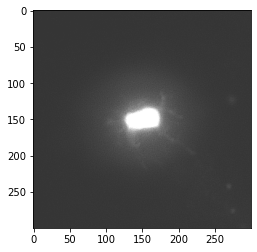

In [40]:
plt.imshow(current_img_standardized_corrected)

(array([7.1466e+04, 3.8994e+04, 0.0000e+00, 3.2856e+04, 2.5845e+04,
        0.0000e+00, 1.7559e+04, 1.1772e+04, 0.0000e+00, 8.4570e+03,
        5.9730e+03, 0.0000e+00, 4.4880e+03, 3.9870e+03, 0.0000e+00,
        3.5160e+03, 3.1620e+03, 0.0000e+00, 2.9370e+03, 2.6700e+03,
        0.0000e+00, 2.2170e+03, 2.3490e+03, 0.0000e+00, 2.1990e+03,
        1.9230e+03, 0.0000e+00, 1.6860e+03, 1.4760e+03, 0.0000e+00,
        1.4160e+03, 1.3560e+03, 0.0000e+00, 1.1310e+03, 1.0260e+03,
        0.0000e+00, 9.9900e+02, 9.6000e+02, 0.0000e+00, 8.7000e+02,
        8.5800e+02, 0.0000e+00, 7.7400e+02, 0.0000e+00, 6.4800e+02,
        6.6000e+02, 0.0000e+00, 5.9400e+02, 5.2200e+02, 0.0000e+00,
        5.1000e+02, 4.4700e+02, 0.0000e+00, 3.6900e+02, 3.9600e+02,
        0.0000e+00, 3.9000e+02, 3.7800e+02, 0.0000e+00, 3.6300e+02,
        3.2100e+02, 0.0000e+00, 3.1200e+02, 3.0000e+02, 0.0000e+00,
        2.6700e+02, 2.3400e+02, 0.0000e+00, 2.4300e+02, 2.7300e+02,
        0.0000e+00, 2.1000e+02, 2.0100e+02, 0.00

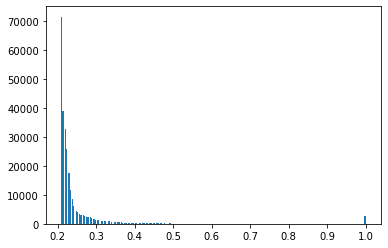

In [35]:
current_img_standardized_clipped = current_img_standardized_corrected.clip(0.2, 1.0)
plt.hist(current_img_standardized_clipped.ravel(), bins=256)

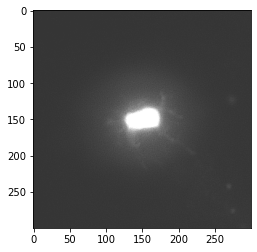

In [36]:
plt.imshow(current_img_standardized_clipped)

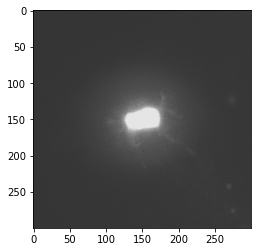

In [45]:
current_img_standardized_clipped = current_img_standardized_corrected.clip(0.0, 0.9)
plt.imshow(current_img_standardized_clipped)